In [25]:
!wget https://lms.skillfactory.ru/assets/courseware/v1/e29e03f46e0d0f1d09e2281ffd44acb8/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/cacao_flavors.csv

--2020-06-25 18:02:38--  https://lms.skillfactory.ru/assets/courseware/v1/e29e03f46e0d0f1d09e2281ffd44acb8/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/cacao_flavors.csv
Resolving lms.skillfactory.ru (lms.skillfactory.ru)... 84.201.175.12
Connecting to lms.skillfactory.ru (lms.skillfactory.ru)|84.201.175.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134751 (132K) [application/vnd.ms-excel]
Saving to: ‘cacao_flavors.csv.2’

cacao_flavors.csv.2 100%[===================>] 131.59K   528KB/s    in 0.2s    

2020-06-25 18:02:39 (528 KB/s) - ‘cacao_flavors.csv.2’ saved [134751/134751]



- Bar id — ID батончика в базе данных
- Company (Maker-if known) — название компании, изготовившей батончик.
- Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
- Broad Bean Origin — название региона, где были выращены какао-бобы.
- Company Location — страна, в которой произведён шоколадный батончик.
- Bean Type — вид какао-бобов, используемых в батончике.
- REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
- Review Date — год публикации рецензии.
- cacao Percent — процент какао в шоколаде.
- Rating — оценка батончика фокус-группой.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

cacao = pd.read_csv("./cacao_flavors.csv")
display(cacao)
# cacao.replace(r'^\s*$', '---', inplace=True, regex=True)
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [3]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [4]:
new_columns = [
    "bar_id",
    "company",
    "specific_origin",
    "ref",
    "review_date",
    "cacao_percent",
    "company_location",
    "rating",
    "bean_type",
    "broad_origin"
]

cacao.columns = new_columns

In [5]:
cacao.drop(['bar_id'], inplace=True, axis=1)

In [6]:
cacao['company'].value_counts().reset_index()

,index,company
0,,99
1,Soma,45
2,Fresco,26
3,Bonnat,26
4,Pralus,25
...,...,...
403,Green Bean to Bar,1
404,Glennmade,1
405,Ah Cacao,1
406,Majani,1


In [7]:
comp_freq = cacao['company'].value_counts()
comp_freq = comp_freq[comp_freq > 10]
display(comp_freq.size)

31

In [8]:
cacao['specific_origin'].value_counts()

                         58
Madagascar               55
Peru                     44
Ecuador                  39
Dominican Republic       33
                         ..
Conacado, Manifesto       1
O'payo, Waslala           1
Montanya                  1
Xoconusco, cacao Real     1
Ocumare 61, Puertomar     1
Name: specific_origin, Length: 1013, dtype: int64

In [9]:
c = cacao['specific_origin'].value_counts()
c[c > 10].reset_index()

,index,specific_origin
0,,58
1,Madagascar,55
2,Peru,44
3,Ecuador,39
4,Dominican Republic,33
5,Venezuela,21
6,Chuao,18
7,Sambirano,18
8,Ocumare,16
9,Papua New Guinea,15


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

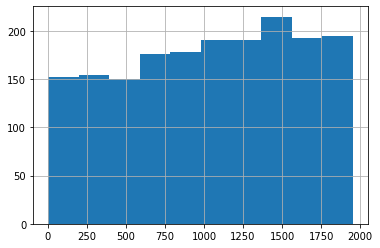

In [10]:
cacao['ref'].hist()
cacao['ref'].describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

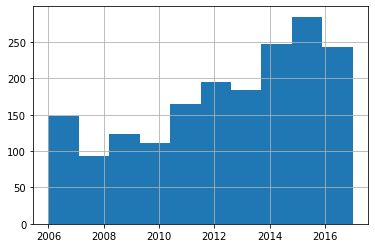

In [11]:
cacao['review_date'].hist()
cacao['review_date'].describe()

In [12]:
d = cacao['review_date'].describe()
min_threshold = d['25%'] - (d['75%'] - d['25%']) * 1.5
max_threshold = d['75%'] + (d['75%'] - d['25%']) * 1.5
print(min_threshold, max_threshold)

2002.5 2022.5


In [13]:
cacao['cacao_percent'] = cacao['cacao_percent'].apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cacao_percent, dtype: float64

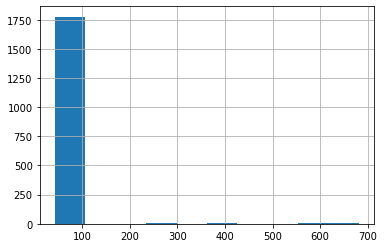

In [14]:
cacao['cacao_percent'].hist()
cacao['cacao_percent'].describe()

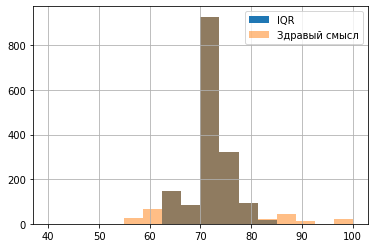

In [15]:
cacao_percent = cacao['cacao_percent']

iqr = cacao_percent.quantile(0.75) - cacao_percent.quantile(0.25)
min_t = cacao_percent.quantile(0.25) - iqr * 1.5
max_t = cacao_percent.quantile(0.75) + iqr * 1.5

cacao_percent[(cacao_percent > min_t) & (cacao_percent < max_t)].hist(bins=16, range=(40, 100), label="IQR")
cacao_percent.hist(bins=16, range =(40, 100), label="Здравый смысл", alpha = 0.5)



plt.legend()

In [16]:
cacao = cacao[cacao['cacao_percent'] <= 100]

In [17]:
country_counts = cacao['company_location'].value_counts()
country_counts[country_counts > 10]

U.S.A.         756
France         155
Canada         124
U.K.            94
Italy           63
Ecuador         54
Australia       49
Belgium         39
Switzerland     38
Germany         35
Spain           25
Austria         25
Colombia        22
Hungary         22
Venezuela       20
Madagascar      17
Japan           17
New Zealand     17
Brazil          17
Peru            17
Denmark         15
Vietnam         11
Name: company_location, dtype: int64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

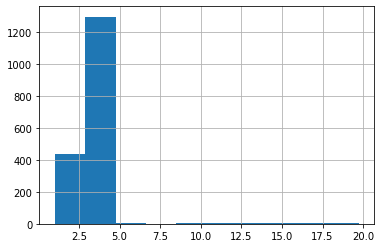

In [18]:
cacao['rating'].hist()
cacao['rating'].describe()

count    1690.000000
mean        3.220710
std         0.416895
min         2.250000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

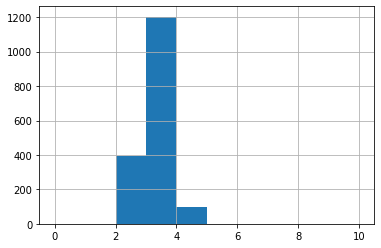

In [19]:
rating = cacao['rating']

q25 = rating.quantile(.25)
q75 = rating.quantile(.75)
iqr = q75 - q25
min_thresh = q25 - (1.5 * iqr)
max_thresh = q75 + (1.5 * iqr)

filtered_rating = rating[rating.between(min_thresh, max_thresh)]
filtered_rating.hist(bins=10, range=(0, 10))
filtered_rating.describe()

In [20]:
cacao = cacao[cacao['rating'].between(min_thresh, max_thresh)]

In [21]:
def sanitize_bean_type(bt):
    if bt.strip() in ('', 'nan'):
        return None
    
    if '(' in bt:
        return bt[:bt.find('(')]
    
    return bt

bean_type = cacao['bean_type'].astype(str).apply(sanitize_bean_type)
display(bean_type.value_counts())

cacao['bean_type'] = bean_type

Trinitario                 401
Criollo                    147
Forastero                   97
Forastero                   82
Criollo, Trinitario         37
Blend                       36
Criollo                     18
Trinitario, Criollo          9
Trinitario                   4
Nacional                     3
Matina                       3
EET                          3
Beniano                      3
Amazon, ICS                  2
Trinitario, Forastero        2
Amazon mix                   2
Nacional                     2
Criollo, Forastero           2
Blend-Forastero,Criollo      1
Forastero, Trinitario        1
Amazon                       1
Trinitario, TCGA             1
Trinitario, Nacional         1
Criollo, +                   1
CCN51                        1
Name: bean_type, dtype: int64

In [22]:
broad_origin = cacao['broad_origin'].astype(str).apply(lambda x: x if x.strip() not in ('', ) else None)
display(broad_origin.unique().shape)
vc = broad_origin.value_counts()

display(vc[vc > 10].count())

(98,)

25

In [23]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x


broad_origin = cacao['broad_origin'].apply(fix_countries).sort_values()
display(broad_origin.value_counts())
cacao['broad_origin'] = broad_origin

Venezuela                                                    202
Ecuador                                                      179
Peru                                                         160
Madagascar                                                   138
DominicanRepublic                                            135
                                                            ... 
Suriname                                                       1
Peru,Ecuador,Venezuela                                         1
Madagascarrtinique                                             1
Venezuela,Bolivia,DomincanRepublic                             1
Guatemala,DomincanRepublic,Peru,Madagascar,PapuaNewGuinea      1
Name: broad_origin, Length: 94, dtype: int64

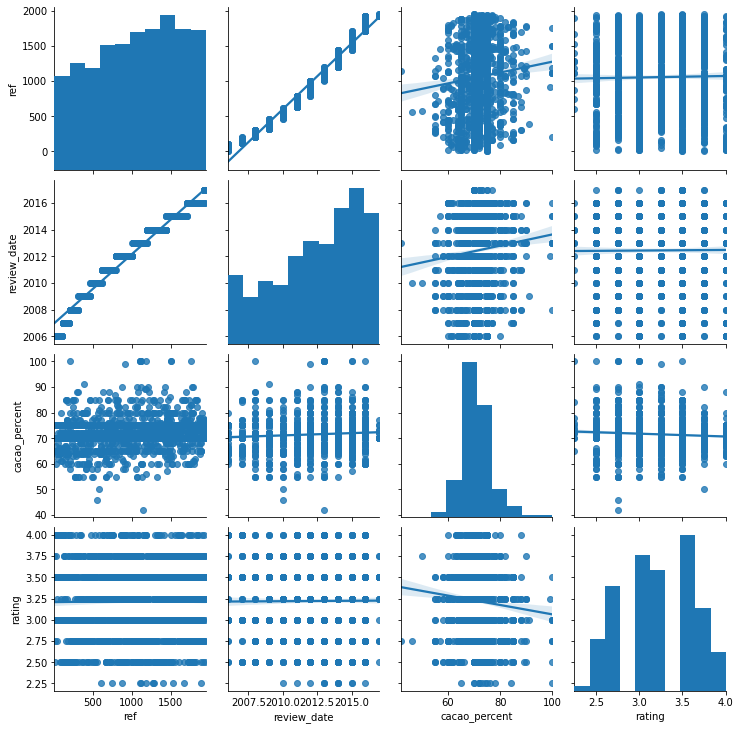

In [24]:
sns.pairplot(cacao, kind="reg")

In [25]:
cacao.corr()

,ref,review_date,cacao_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cacao_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [26]:
del cacao['ref']

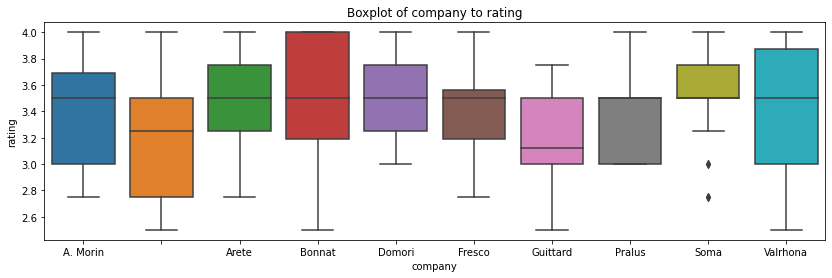

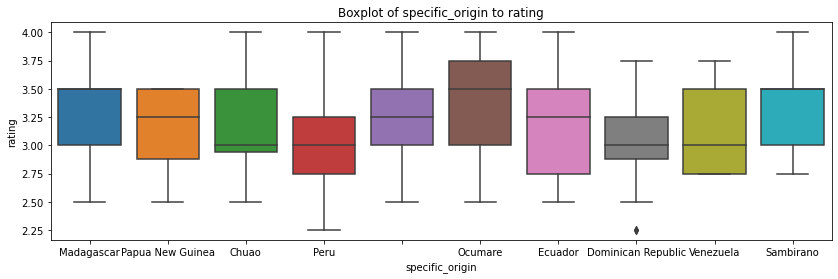

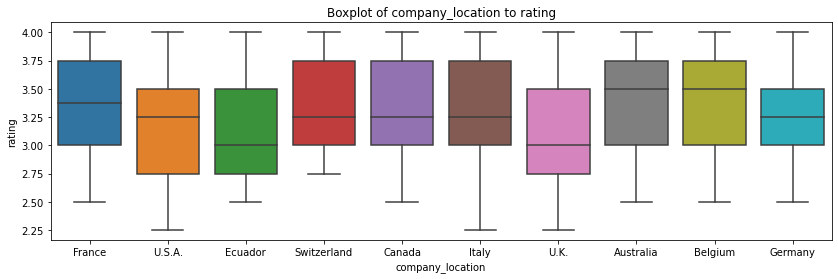

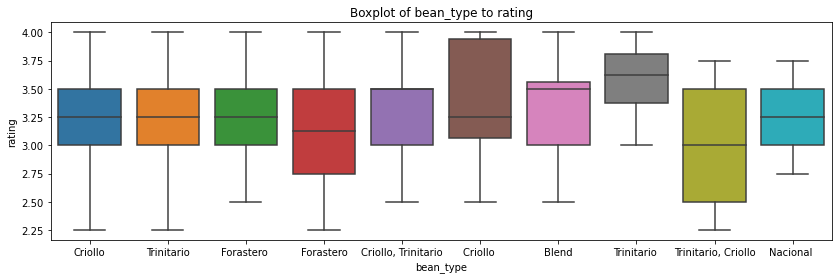

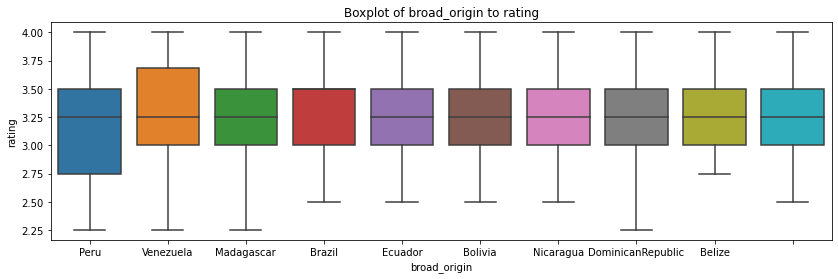

In [27]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    value_counts = cacao[col].value_counts()
    top_10 = value_counts.index[:10]
    data = cacao[cacao[col].isin(top_10)]

    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='rating', data=data, ax=ax)
    ax.set_title(f"Boxplot of {col} to rating")

    plt.show()

In [46]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    value_counts = cacao[col].value_counts()
    top_10 = value_counts.index[:10]
    comb_list = list(combinations(top_10, 2))
    
    for a, b in comb_list:
        a_values = cacao.loc[cacao[col] == a, 'rating']
        b_values = cacao.loc[cacao[col] == b, 'rating']        
        
        pval = ttest_ind(a_values, b_values).pvalue
        
        if pval <= (0.05 / len(comb_list)):
            print(f"Найдены статистически значимые различия для колонки {col}")
            break
    

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location
